Loading required libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn import preprocessing
%matplotlib inline

Load Data From CSV File  

In [2]:
df = pd.read_csv('IRIS.csv')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


#### Let’s see how many of each class is in our data set 


In [3]:
df['species'].value_counts()

species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

Visualizing the data

       sepal_length  sepal_width  petal_length  petal_width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.054000      3.758667     1.198667
std        0.828066     0.433594      1.764420     0.763161
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB
Non

array([[<Axes: title={'center': 'petal_width'}>]], dtype=object)

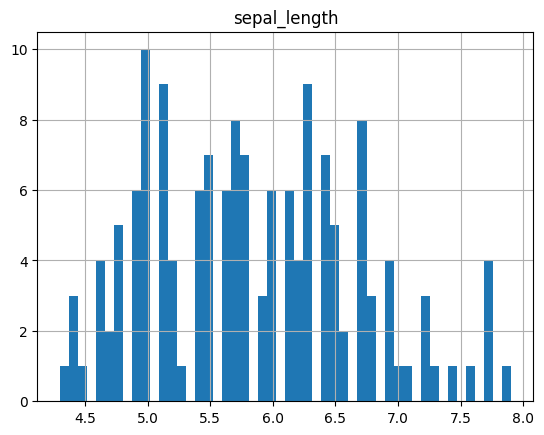

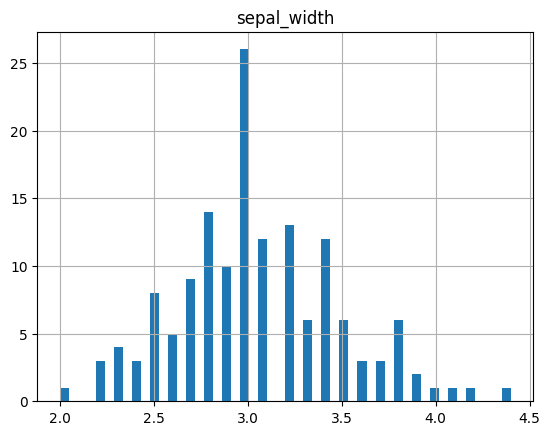

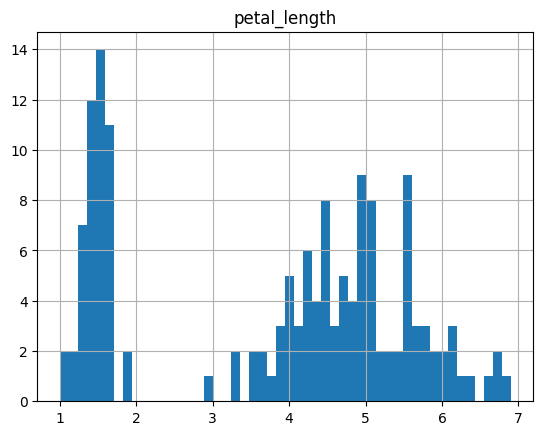

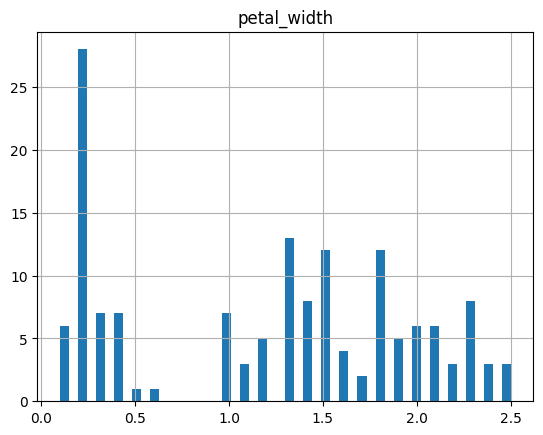

In [4]:
df_description = df.describe()
print(df_description)


# Print DataFrame information
print(df.info())

df.hist(column='sepal_length', bins=50)
df.hist(column='sepal_width', bins=50)
df.hist(column='petal_length', bins=50)
df.hist(column='petal_width', bins=50)

### Feature set


Let's define feature sets, X:


In [5]:
df.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

To use scikit-learn library, we have to convert the Pandas data frame to a Numpy array:


In [6]:
X = df[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']] .values  #.astype(float)
X[0:5]


array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [7]:
y = df['species'].values
y[0:5]

np.unique(y)

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

Plotting the Data

### Train Test Split  

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (105, 4) (105,)
Test set: (45, 4) (45,)


### Normalize Data 


In [9]:
X_train_norm = preprocessing.StandardScaler().fit(X_train).transform(X_train.astype(float))
X_train_norm[0:5]

array([[-1.98167581, -0.11196264, -1.6774331 , -1.59956235],
       [-0.22576054,  3.24691664, -1.4377998 , -1.18991833],
       [ 0.0250845 , -0.11196264,  0.17972497,  0.31210973],
       [ 0.27592954, -0.11196264,  0.41935827,  0.17556172],
       [ 0.77761962, -0.11196264,  0.9585332 ,  0.72175374]])

<div id="classification">
    <h2>Classification</h2>
</div>

<h3>K nearest neighbor (KNN)</h3>


#### Import library 


In [10]:
from sklearn.neighbors import KNeighborsClassifier

In [11]:
k = 4
#Train Model and Predict  
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train_norm,y_train)
neigh

KNeighborsClassifier(n_neighbors=4)

In [12]:
X_test_norm = preprocessing.StandardScaler().fit(X_test).transform(X_test.astype(float))
X_test_norm[0:5]

array([[ 0.72873458, -0.5823671 ,  1.13619554,  1.34326995],
       [-0.0655609 ,  1.56570827, -0.90476983, -0.91409242],
       [ 1.8634424 , -0.5823671 ,  1.39785776,  1.09245191],
       [ 2.09038396, -0.15275203,  1.65951999,  1.34326995],
       [ 1.74997161, -0.36755956,  1.50252265,  0.96704289]])

### Predicting
We can use the model to make predictions on the test set:


In [13]:
yhat = neigh.predict(X_test_norm)
yhat[0:5]

array(['Iris-virginica', 'Iris-setosa', 'Iris-virginica',
       'Iris-virginica', 'Iris-virginica'], dtype=object)

### Evaluation

In [14]:
from sklearn import metrics
print("Train set Accuracy: ", metrics.accuracy_score(y_train, neigh.predict(X_train_norm)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat))

Train set Accuracy:  0.9523809523809523
Test set Accuracy:  0.8888888888888888


In [15]:
train_accuracy = []
test_accuracy = []
k = 15
for k in range(1, k):
    neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train_norm,y_train)
    yhat = neigh.predict(X_test_norm)
    train_accuracy.append(metrics.accuracy_score(y_train, neigh.predict(X_train_norm)))
    test_accuracy.append(metrics.accuracy_score(y_test, yhat))

print("Train set accuracy: ",train_accuracy)
print("Test set accuracy: ",test_accuracy)

Train set accuracy:  [1.0, 0.9714285714285714, 0.9523809523809523, 0.9523809523809523, 0.9523809523809523, 0.9809523809523809, 0.9619047619047619, 0.9714285714285714, 0.9714285714285714, 0.9809523809523809, 0.9714285714285714, 0.9809523809523809, 0.9714285714285714, 0.9714285714285714]
Test set accuracy:  [0.8888888888888888, 0.9111111111111111, 0.8888888888888888, 0.8888888888888888, 0.8444444444444444, 0.8666666666666667, 0.8444444444444444, 0.8888888888888888, 0.8666666666666667, 0.8666666666666667, 0.8666666666666667, 0.9333333333333333, 0.8888888888888888, 0.8888888888888888]


Plotting the accuracy with k values

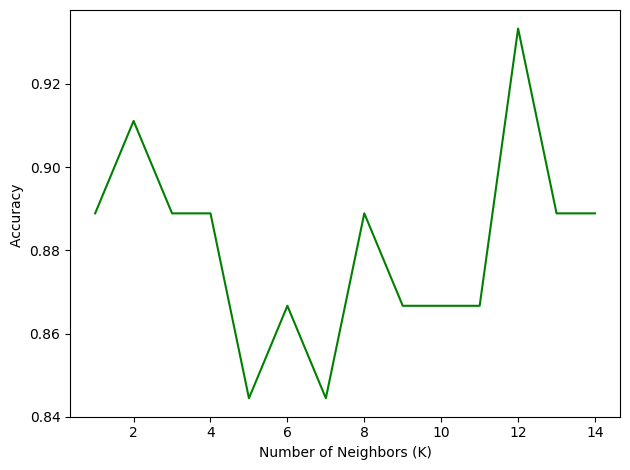

In [16]:
plt.plot(range(1,k+1),test_accuracy,'g')
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbors (K)')
plt.tight_layout()
plt.show()

Printing the k value with highest accuracy for the test set.

In [17]:
m = max(test_accuracy)
i = test_accuracy.index(m)+1
print("The k value %d has the highest accuracy of %.3f"%(i,m))

The k value 12 has the highest accuracy of 0.933


## Decision Tree

In [18]:
from sklearn.tree import DecisionTreeClassifier

dTree = DecisionTreeClassifier(criterion="entropy", max_depth = 4)
dTree

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [19]:
dTree.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

#### Predicting

In [20]:
predTree = dTree.predict(X_test)

#### Evaluation

In [21]:
print("DecisionTrees's Accuracy: %.3f"% metrics.accuracy_score(y_test, predTree))

DecisionTrees's Accuracy: 0.978


### Visualization of the Decision Tree

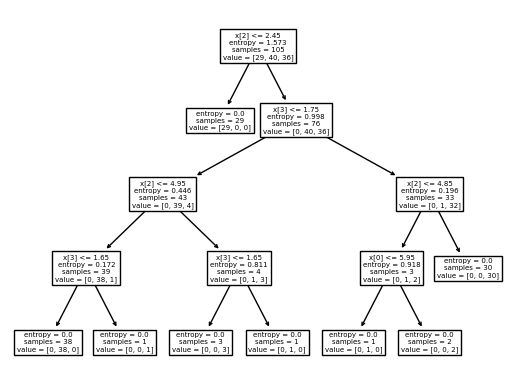

In [22]:
from sklearn import metrics
import matplotlib.pyplot as plt
import sklearn.tree as tree

tree.plot_tree(dTree)
plt.show()

## SVM

In [23]:
from sklearn.svm import SVC

model = SVC(kernel="linear", gamma=.5, probability=True)
model.fit(X_train,y_train)

SVC(gamma=0.5, kernel='linear', probability=True)

#### Prediciton and Evaluation

In [24]:
yhat = model.predict(X_test)
print("SVM's Accuracy: %.3f"%metrics.accuracy_score(y_test, yhat))

SVM's Accuracy: 0.978


## Logistic Regression

In [25]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
LR = LogisticRegression(C=0.5).fit(X_train,y_train)
LR

LogisticRegression(C=0.5)

#### Predict

In [26]:
yhat = LR.predict(X_test)
yhat

array(['Iris-virginica', 'Iris-setosa', 'Iris-virginica',
       'Iris-virginica', 'Iris-virginica', 'Iris-versicolor',
       'Iris-virginica', 'Iris-setosa', 'Iris-setosa', 'Iris-virginica',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-versicolor',
       'Iris-virginica', 'Iris-setosa', 'Iris-versicolor', 'Iris-setosa',
       'Iris-setosa', 'Iris-virginica', 'Iris-setosa', 'Iris-virginica',
       'Iris-versicolor', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-virginica',
       'Iris-versicolor', 'Iris-setosa', 'Iris-virginica', 'Iris-setosa',
       'Iris-versicolor', 'Iris-virginica', 'Iris-virginica',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
       'Iris-virginica', 'Iris-setosa', 'Iris-versicolor', 'Iris-setosa',
       'Iris-virginica'], dtype=object)

#### Evalutation

In [27]:
print("Logistc Regression's Accuracy: %.3f"%metrics.accuracy_score(y_test, yhat))

Logistc Regression's Accuracy: 0.978


#### Decision Tree, SVM and Logistic Regression show better accuracy score of 0.978 over KNN which has the maximum accuracy score of 0.933 when k=12